In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

titanic_data=pd.read_csv(r"/Titanic0.csv")
print(titanic_data)

titanic_data.shape
titanic_data.info()


     PassengerId  Survived  Pclass         Lname  \
0              1         0       3        Braund   
1              2         1       1       Cumings   
2              3         1       3     Heikkinen   
3              4         1       1      Futrelle   
4              5         0       3         Allen   
..           ...       ...     ...           ...   
151          152         1       1         Pears   
152          153         0       3           Meo   
153          154         0       3  van Billiard   
154          155         0       3         Olsen   
155          156         0       1      Williams   

                                            Name     Sex   Age  SibSp  Parch  \
0                                Mr. Owen Harris    male  22.0      1      0   
1     Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0   
2                                    Miss. Laina  female  26.0      0      0   
3             Mrs. Jacques Heath (Lily May Peel)  femal

In [11]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Lname            0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [12]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [14]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [15]:
print(titanic_data['Embarked'].mode()[0])

S


In [16]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [17]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Lname          0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,13.123652,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,21.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,28.141508,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,33.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [19]:
titanic_data['Survived'].value_counts()

0    102
1     54
Name: Survived, dtype: int64

In [20]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

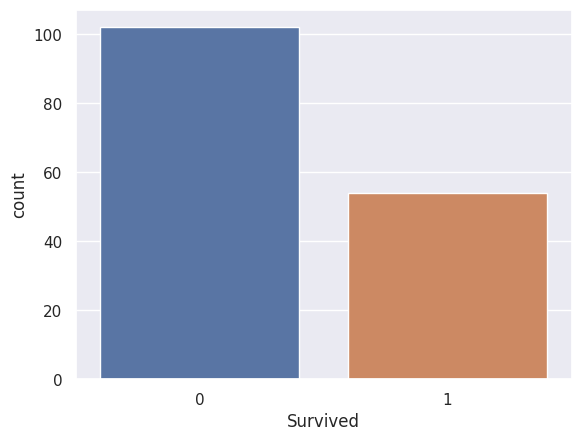

In [21]:
sns.countplot(x='Survived', data=titanic_data)

In [22]:
titanic_data['Sex'].value_counts()

male      100
female     56
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

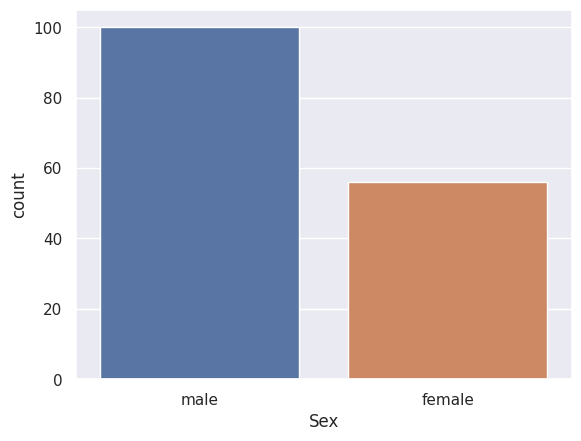

In [23]:
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

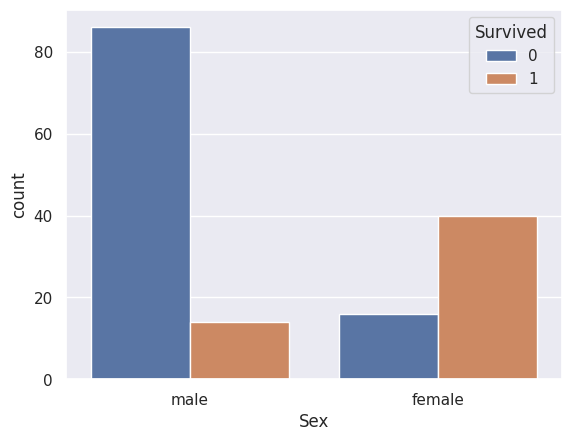

In [24]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

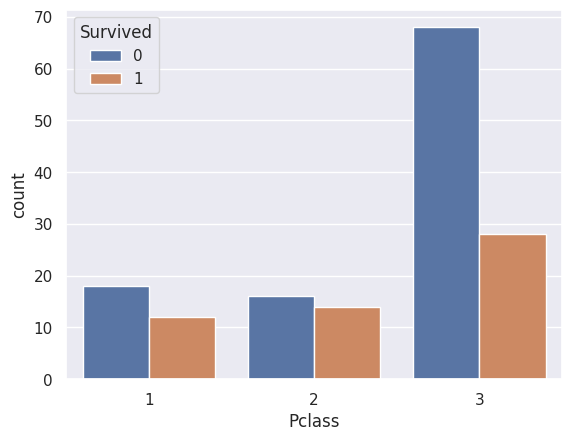

In [25]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

In [26]:
titanic_data['Sex'].value_counts()

male      100
female     56
Name: Sex, dtype: int64

In [27]:
titanic_data['Embarked'].value_counts()

S    111
C     32
Q     13
Name: Embarked, dtype: int64

In [28]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Emarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [29]:
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived', 'Lname', 'Embarked'],axis=1)
Y=titanic_data['Survived']

In [30]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare
0         3    0  22.000000      1      0   7.2500
1         1    1  38.000000      1      0  71.2833
2         3    1  26.000000      0      0   7.9250
3         1    1  35.000000      1      0  53.1000
4         3    0  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
151       1    1  22.000000      1      0  66.6000
152       3    0  55.500000      0      0   8.0500
153       3    0  40.500000      0      2  14.5000
154       3    0  28.141508      0      0   7.3125
155       1    0  51.000000      0      1  61.3792

[156 rows x 6 columns]


In [31]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
151    1
152    0
153    0
154    0
155    0
Name: Survived, Length: 156, dtype: int64


In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(156, 6) (124, 6) (32, 6)


In [34]:
model=LogisticRegression()

In [35]:
model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
X_train_prediction=model.predict(X_train)

In [37]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data: ',training_data_accuracy)

Accuracy score of training data:  0.8064516129032258


In [38]:
X_test_prediction=model.predict(X_test)

In [40]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of test data: ',test_data_accuracy)

Accuracy score of test data:  0.84375
